# Synchrony

[Instantaneous phase synchrony](http://jinhyuncheong.com/jekyll/update/2017/12/10/Timeseries_synchrony_tutorial_and_simulations.html)


[PySpike](http://mariomulansky.github.io/PySpike/#examples)

[PySpike paper](https://arxiv.org/pdf/1603.03293v2.pdf)

[scholarpedia synchrony measures](http://www.scholarpedia.org/article/Population_measures_of_spike_train_synchrony)


There are a number of different approaches to spike train synchrony, which give rise to a corresponding variety of approaches to population measures of synchrony.

To briefly summarize, if u and v are two spike trains with spike times {u1,u2,…,un} and {v1,v2,…,vm} , a measure of spike train synchrony maps the pair to a positive real number. In some measures this number expresses the similarity or synchrony of the pair and, using the notation s(u,v), a high value corresponds to two closely related spike trains. It is more common however, to define a measure of distance, or dissimilarity, and using the notation d(u,v), very similar spike trains correspond to a low value. Either way, it is common for measures of similarity or dissimilarity to be symmetric, such that s(u,v)=s(v,u) or d(u,v)=d(v,u). In the case of dissimilarity measures, it is also common to choose measures that satisfy all the conditions required for the measure to be a metric: a measure of dissimilarity is a metric if it is positive, symmetric, non-degenerate, so that d(u,v)=0 implies u=v and if it satisfies the triangular inequality, so that d(u,w)≤d(u,w)+d(w,v).

Broadly speaking, population measures come in two varieties, those that measure the over-all synchrony of a set of responses and are calculated by averaging single-neuron measures of synchrony, and those which measure the similarity or dissimilarity between two sets of responses. Since they form the base on which the population measures in this article are built, three different single-neuron distance measures are described here.

In [59]:
np.random.seed(1)

sim_params, model_params, syn_params_ex, syn_params_in = set_params(J_in=-44.0)
# initialise class
LS = sim.LeakySimulator(sim_params, model_params, syn_params_ex, syn_params_in)
# build network and return connectivity
conns = LS.build_network()

# == RUN for all 70 patterns ===
spikedet_lst = []
multimet_lst = []

spike_times_lst = []
spike_neurons_lst = []
events_lst = []
times_lst = []
conns_lst = [] # connectivity

for p in patterns:
    
    LS.set_pattern(p)
    
    spikedet, multimet, spike_times, spike_neurons, events, etimes = LS.simulate() 
    spikedet_lst.append(spikedet)
    multimet_lst.append(multimet)
    spike_times_lst.append(spike_times)
    spike_neurons_lst.append(spike_neurons)
    events_lst.append(events)
    times_lst.append(etimes)
    #conns_lst.append(conns)

print('Ran all simulations.')

OR_spike_neurons_lst = [] # reorder
 
for i in range(len(spike_neurons_lst)):
    # reorder the spikes
    NO_i = U.reorder(spike_neurons_lst[i])
    OR_spike_neurons_lst.append(NO_i)


Ran all simulations.


In [124]:
# === CHOOSE AN INDEX (from 0 to 69) ===
idx = 6

#pick a simulation run (one pattern)
SN = spike_neurons_lst[idx]
ST = spike_times_lst[idx] # spike times of one simulation
NO = np.array(OR_spike_neurons_lst[idx]) # ordered neurons of one simulation

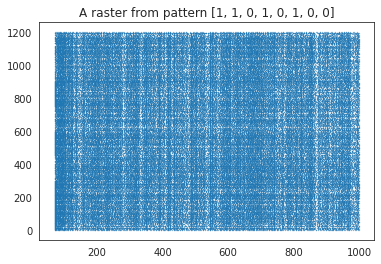

In [245]:
plt.scatter(ST, NO, s=0.05);
plt.title(f'A raster from pattern {patterns[idx]}');

## ISI

### ISI for a single neuron in the population

Given a neuron in the population, calculate the intervals between the spikes.

### How to get the ISI for a neural population?

Averaging single-neuron similarities or dissimilarities is the most straightforward way to measure the overall synchrony of a population of responses (Kreuz et al., 2009)

$$
D=\frac{2}{N(N-1)}\sum_{i=1}^{N-1}\sum_{j=i+1}^Nd(\textbf{u}_i,\textbf{u}_j)
$$

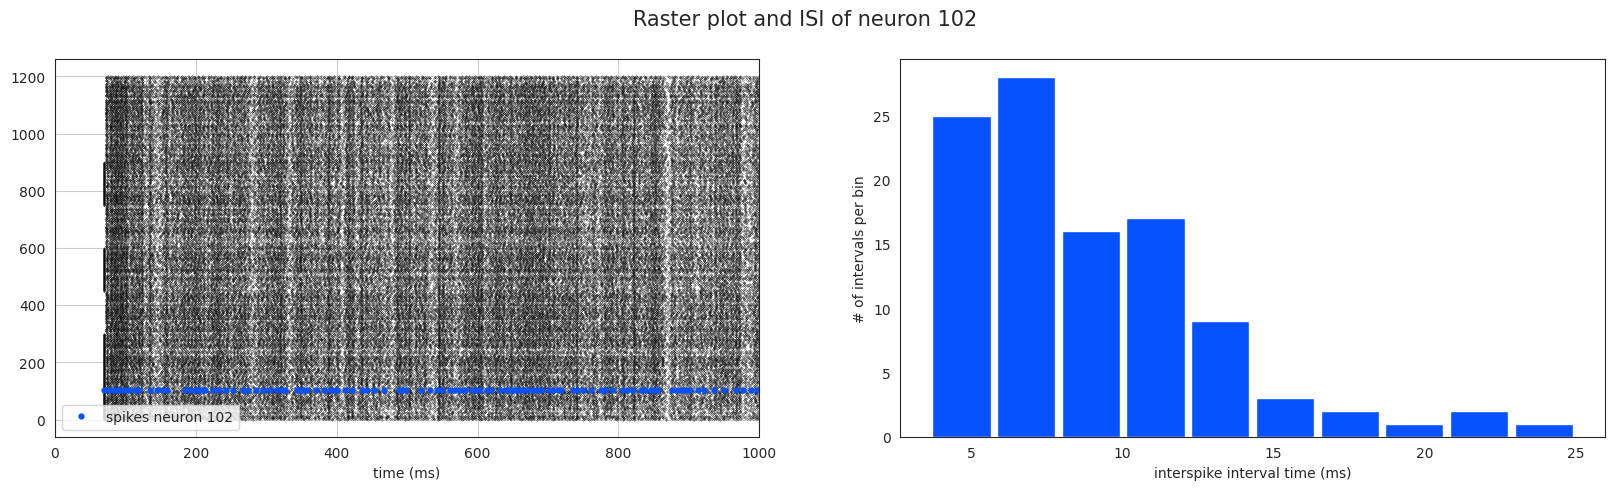

In [237]:
get_ISI(102, NO, ST, plot=True);

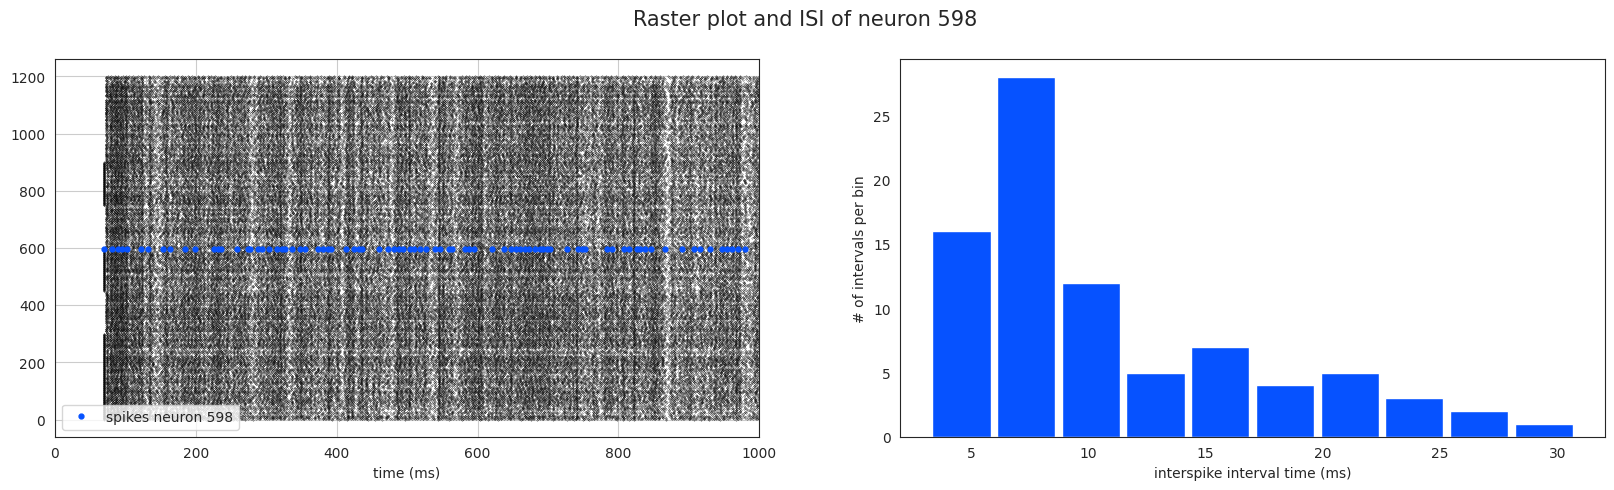

In [238]:
get_ISI(598, NO, ST, plot=True);

In [193]:
population_ISI = []

for i in range(1200):
    
    my_neuron = i+1
    spike_intervals = get_ISI(my_neuron, NO, ST)
    avg_interval_time = round(np.mean(spike_intervals),2)
    population_ISI.append(avg_interval_time)
    
# replace nan with 0's
population_ISI = [0 if math.isnan(x) else x for x in population_ISI]
# convert to array
population_ISI = np.array(population_ISI)

# sort in descending order
sorted_pop_ISI = -np.sort(-population_ISI)

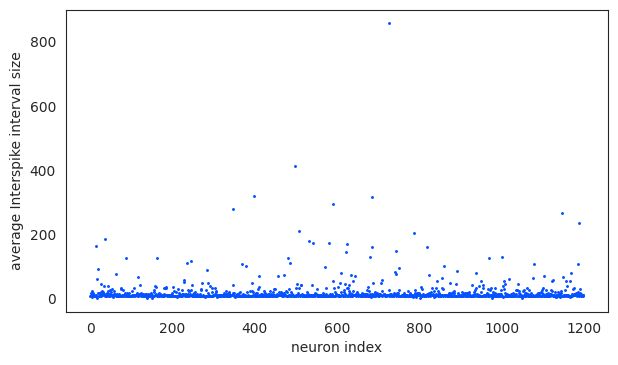

In [216]:
fig = plt.subplots(1, figsize=(7,4), dpi=100)
plt.plot(population_ISI, 'o', color='xkcd:electric blue', ms=1.1 );
plt.ylabel('average Interspike interval size')
plt.xlabel('neuron index');

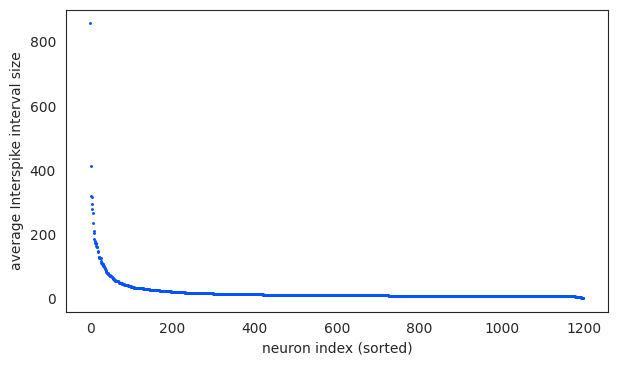

In [239]:
fig = plt.subplots(1, figsize=(7,4), dpi=100)
plt.plot(sorted_pop_ISI, 'o', color='xkcd:electric blue', ms=1.1);
plt.ylabel('average Interspike interval size')
plt.xlabel('neuron index (sorted)');

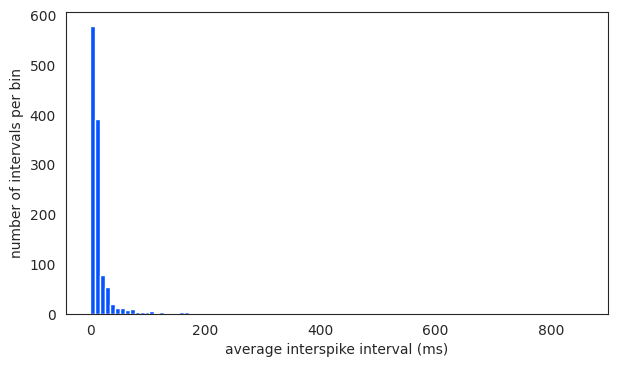

In [243]:
fig = plt.subplots(1, figsize=(7,4), dpi=100)
plt.hist(population_ISI, bins=100, color='xkcd:electric blue');
plt.ylabel('number of intervals per bin')
plt.xlabel('average interspike interval (ms)');

In [233]:
def get_ISI(your_neuron, NO, ST, plot=False):
    '''
    your_neuron: the neuron you want to focus on
    NO: ordered neuron indices
    ST: spike times
    
    '''
    # collect neuron indices 
    neuron_indices = np.where(NO == your_neuron)[0]

    # get y axis
    your_neuron_y = np.full(len(neuron_indices), your_neuron)

    # now get the spike times at these exact indices
    those_times_your_neuron_spiked = ST[neuron_indices]

    # finally, get the differences between these (ISI)
    spike_intervals = np.diff(those_times_your_neuron_spiked)

    if plot == True:
        # make a one dimensional plot 
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5), dpi=100)

        fig.suptitle(f'Raster plot and ISI of neuron {your_neuron}', size=15)
        ax1.scatter(ST, NO, s=0.05, color='k'); # plot all neurons
        ax1.plot(those_times_your_neuron_spiked, your_neuron_y, "o", markersize=3.5, label=f'spikes neuron {your_neuron}', color='xkcd:electric blue');
        ax1.set_xlim(0,1000)
        ax1.grid()
        ax1.legend()
        ax1.set_xlabel('time (ms)');

        ax2.hist(spike_intervals, rwidth=0.9, color='xkcd:electric blue')
        ax2.set_ylabel('# of intervals per bin')
        ax2.set_xlabel('interspike interval time (ms)');
        
    return spike_intervals

## SPIKE-distance

## Methods

In [246]:
# nest
import nest
import nest.raster_plot
import nest.voltage_trace
import random
# other
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import os
import json
import math
import time 
import timeit
import itertools
import numpy as np
np.set_printoptions(suppress=True)
from importlib import reload 
from itertools import permutations 
from itertools import combinations 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("white")

# fitting distributions
import plfit
from plfit import plfit
import powerlaw

import LeakySimulator as sim
reload(sim);

np.random.seed(1)
# initialise useful functions
U = sim.Usefulfunctions()

def set_params(J_ex=6., J_in=-95., C_m=250.0, NE=960, NI=240, stim_end=100.):
    
    sim_params = {

            'N_total':1200,
            'NE': 960, # Default: 4/5 are exci neurons, 1/5 are inh neurons
            'NI': 240,
            'eps':0.1,  # connection probability
            'J_in':-95.0,
            'J_ex':6.0,
            'resolution':0.1,  # temporal resolution of simulation in ms. Kumar2008: 0.1
            'delay':1.5,  # synaptic delay in the network
            'n_threads':8,
            'stim_start':0., # start applying current (dc)
            'stim_end':100., # end applying current (dc)
            'simtime':1100., # simulation time 
            'sub_fr':0.9, # subthreshold current amplitude
            'sup_fr':1.01, # suprathreshold current amplitude
        }

    model_params = {

            'C_m': 250.0,
            'E_L': -70.0,
            'E_ex': 0.0,
            'E_in': -80.0,
            'I_e': 0.0,
            'V_reset': -70.0,
            'V_th': -50.0,
            'g_L': 16.7,
            't_ref': 2.0, # Duration of refractory period
            'tau_syn_ex': 0.326, # Rise time of the excitatory synaptic alpha function
            'tau_syn_in': 0.326,
        }

    # parameters for STDP synapses
    syn_params_ex = {

            'model':'stdp_synapse',
            'lambda': 0.01,
            'alpha': 1.0,
            'delay': 1.5,
            'weight': 6.0,
            'Wmax': 100.0   
        }

    syn_params_in = {

            'model':'stdp_synapse',
            'lambda': 0.01,
            'alpha': 1.0,
            'delay': 1.5,
            'weight':-95.0,
            'Wmax':-100.0  
        }
     
    sim_params['NE'] = NE
    sim_params['NI'] = NI
    sim_params['J_in'] = J_in
    sim_params['J_ex'] = J_ex
    sim_params['C_m'] = C_m
    
    syn_params_ex['weight'] = J_ex
    syn_params_in['weight'] = J_in
    
    return sim_params, model_params, syn_params_ex, syn_params_in

patterns = []
# make permutations for 8 bit pattern
for perm in U.make_permutations():
    patterns.append(perm)